# Setup

In [1]:
import torch
from torchvision import datasets, transforms 
from sklearn.metrics import classification_report

In [2]:
%run setup.ipynb 

# Training with augmentation

Now we've trained our model and assessed its performance on the feeder data... it's not the worst, but let's see if we can't make it a bit stronger by adding augmentations.

Batch size: 16, epochs: 50, optimizer: Adam 

## Augmentation round 1

First, just gonna mess up the pictures a little - no sciency arguments for it other than intuitively trying to capture that the feeder images are more grainy and the birds are not always perfectly posed (hence the crop).

In [3]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation1 = transforms.Compose([
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug1 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation1)
dataloader_train_aug1 = torch.utils.data.DataLoader(dataset_train_aug1, batch_size=16, shuffle=True, num_workers=4)

In [ ]:
# LOOKING AT THE AUGMENTATIONS 

# inputs, classes = next(iter(dataloader_train_aug1))
# out = torchvision.utils.make_grid(inputs)
# imshow(out, title=[class_labels[x] for x in classes])

Load in a fresh ResNet50 that's prepped for transfer learning and optimizer

In [54]:
untrained_model_aug1 = load_and_prep_resnet50()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, untrained_model_aug1.parameters()), lr=0.0005)

### Training

In [55]:
trained_model_aug1, trained_aug1_info = train_model(model=untrained_model_aug1, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug1)

Epoch 1/50
----------
Train Loss: 1.7598 Acc: 0.4635
Val Loss: 1.5966 Acc: 0.7404
Epoch time 1m 42s
----------

Epoch 2/50
----------
Train Loss: 1.4063 Acc: 0.7473
Val Loss: 1.3360 Acc: 0.7885
Epoch time 1m 42s
----------

Epoch 3/50
----------
Train Loss: 1.1868 Acc: 0.7808
Val Loss: 1.1791 Acc: 0.8654
Epoch time 1m 33s
----------

Epoch 4/50
----------
Train Loss: 1.0062 Acc: 0.8311
Val Loss: 1.1091 Acc: 0.9327
Epoch time 1m 34s
----------

Epoch 5/50
----------
Train Loss: 0.9086 Acc: 0.8683
Val Loss: 0.9307 Acc: 0.8558
Epoch time 1m 37s
----------

Epoch 6/50
----------
Train Loss: 0.8129 Acc: 0.8563
Val Loss: 0.8083 Acc: 0.9519
Epoch time 1m 43s
----------

Epoch 7/50
----------
Train Loss: 0.7427 Acc: 0.8814
Val Loss: 0.7615 Acc: 0.9423
Epoch time 1m 43s
----------

Epoch 8/50
----------
Train Loss: 0.6594 Acc: 0.8934
Val Loss: 0.7258 Acc: 0.9519
Epoch time 1m 39s
----------

Epoch 9/50
----------
Train Loss: 0.6555 Acc: 0.8862
Val Loss: 0.6734 Acc: 0.9423
Epoch time 1m 41s
----

In [ ]:
# old save with lr = 0.001 
# torch.save({"aug": trained_model_aug1.state_dict(), "aug_info": trained_aug1_info},"aug1Model_50.tar") 

### Training Results

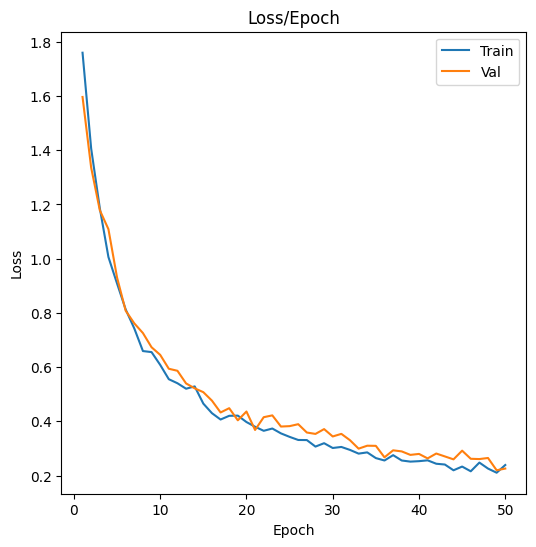

In [56]:
plot_loss(trained_aug1_info["train_loss"], trained_aug1_info["val_loss"], ["Train", "Val"])

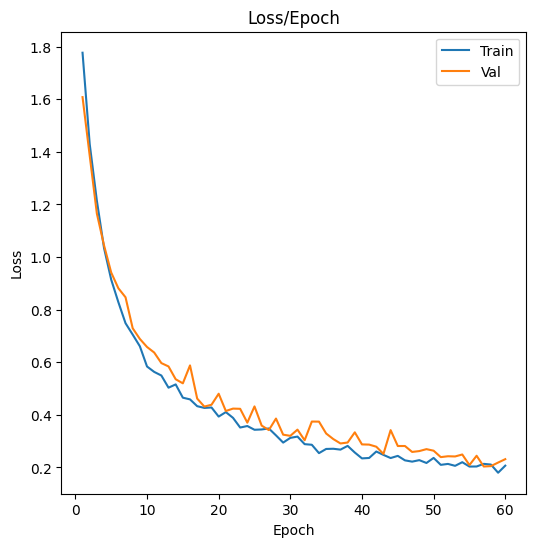

In [19]:
plot_loss(trained_aug1_info["train_loss"], trained_aug1_info["val_loss"], ["Train", "Val"])

In [57]:
print_stats(trained_aug1_info)

Lowest loss was 0.2196 at epoch 49
Highest accuracy was 0.9712 at epoch 50
Number of epochs run  50
Batch size was  16


In [58]:
truel_aug1, predl_aug1 = labels_and_predictions(dataloader_test, trained_model_aug1, device)
test_acc_aug1 = accuracy(truel_aug1, predl_aug1)
print("Accuracy: ", test_acc_aug1)
print(classification_report(truel_aug1, predl_aug1, target_names=class_labels))

Accuracy:  94.28571428571428
              precision    recall  f1-score   support

     blueTit       0.93      0.93      0.93        15
   chaffinch       0.83      1.00      0.91        15
     coalTit       1.00      0.93      0.97        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       1.00      0.93      0.97        15
       robin       1.00      0.87      0.93        15
    starling       0.88      1.00      0.94        15

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



Accuracy:  29.537767756482523
[[  23    2    3   23 1056   11  960]
 [   6  341    5  225  300   85 2590]
 [  19   10   63   80  515   12 1147]
 [   0   19    1 1227  188    5  560]
 [   3    7    4   22  973    0 1024]
 [   2   24    0    3  147   72 1180]
 [   8   16    2   26   22   83 1985]]
              precision    recall  f1-score   support

     blueTit       0.38      0.01      0.02      2078
   chaffinch       0.81      0.10      0.17      3552
     coalTit       0.81      0.03      0.07      1846
   goldfinch       0.76      0.61      0.68      2000
    greatTit       0.30      0.48      0.37      2033
       robin       0.27      0.05      0.08      1428
    starling       0.21      0.93      0.34      2142

    accuracy                           0.31     15079
   macro avg       0.51      0.32      0.25     15079
weighted avg       0.54      0.31      0.25     15079



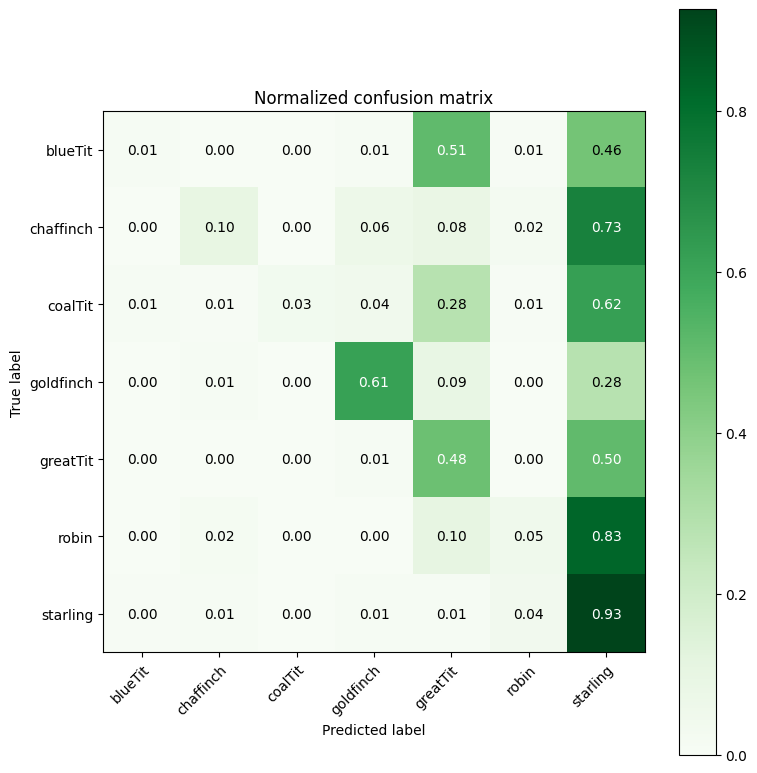

In [ ]:
truel_feeder, predl_feeder = labels_and_predictions(dataloader_feeder, trained_model_aug1, device)
feeder_acc_aug1 = accuracy(truel_feeder, predl_feeder)
plot_confusion_matrix(truel_feeder, predl_feeder, class_labels, normalize=True)
print(classification_report(truel_feeder, predl_feeder, target_names=class_labels))

In [62]:
print("Accuracy: ", feeder_acc_aug1)

Accuracy:  31.06306784269514


In [60]:
# new save 1/12 including test and feeder acc
save_function("aug1_50_lr0005.tar",trained_model_aug1, trained_aug1_info, {"optimizer": "Adam with lr=0.0005", "test_acc": test_acc_aug1, "feeder_acc": feeder_acc_aug1}) 

In [ ]:
# Confirm load'able again
m, i = load_function("Models/aug1_50_lr0005.tar")
print_stats(i)

Lowest loss was 0.2196 at epoch 49
Highest accuracy was 0.9712 at epoch 50
Number of epochs run  50
Batch size was  16
Optimizer used:  Adam with lr=0.0005
Overall accuracy on test data 94.2857
Overall accuracy on feeder data 31.0631


### Finetuning

In [ ]:
# unfreeze_layers(trained_model_aug1)
# model_aug1, model_aug1_info = train_model(model=trained_model_aug1, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug1)

In [ ]:
# torch.save({"aug1": model_aug1.state_dict(), "aug1_info": model_aug1_info, "freeze_aug1_info": trained_aug1_info},"aug1Model_60.tar")

### Round 1 results

In [ ]:
visualize_model(model_aug1, dataloader_tiny_val, class_labels, device)

In [ ]:
plot_accuracies(model_aug1_info["train_loss"], model_aug1_info["val_loss"], ["Train", "Val"])

In [ ]:
plot_accuracies(model_aug1_info["train_acc"], model_aug1_info["val_acc"], ["Train", "Val"])

In [ ]:
truel, predl = makeAll(dataloader_test, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


In [ ]:
print(classification_report(truel, predl, target_names=class_labels))

### On feeder

In [ ]:
truel, predl = makeAll(dataloader_feeder, model_aug1, device)
plot_confusion_matrix(truel, predl, class_labels, normalize=True)
print("Accuracy", (np.sum(predl==truel)/predl.size * 100))


## Augmentation Round 2

Add blur and colorjitter

In [26]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation2 = transforms.Compose([
    transforms.ColorJitter(brightness=0.1), # Added
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions
    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug2 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation2)
dataloader_train_aug2 = torch.utils.data.DataLoader(dataset_train_aug2, batch_size=16, shuffle=True, num_workers=2)

Load in a fresh ResNet50 that's prepped for transfer learning

In [ ]:
untrained_model_aug2 = load_and_prep_resnet50()
optimizer = torch.optim.Adam(untrained_model_aug2.parameters(), lr=0.0005)

### Training

In [28]:
trained_model_aug2, trained_aug2_info = train_model(model=untrained_model_aug2, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug2) 

Epoch 1/50
----------
Train Loss: 1.8211 Acc: 0.3509
Val Loss: 1.7635 Acc: 0.3077
Epoch time 1m 48s
----------

Epoch 2/50
----------
Train Loss: 1.5263 Acc: 0.6323
Val Loss: 1.6038 Acc: 0.6154
Epoch time 1m 45s
----------

Epoch 3/50
----------
Train Loss: 1.3376 Acc: 0.7006
Val Loss: 1.5585 Acc: 0.5769
Epoch time 1m 30s
----------

Epoch 4/50
----------
Train Loss: 1.1855 Acc: 0.7401
Val Loss: 1.4947 Acc: 0.5481
Epoch time 1m 30s
----------

Epoch 5/50
----------
Train Loss: 1.0735 Acc: 0.7569
Val Loss: 1.3859 Acc: 0.6346
Epoch time 1m 30s
----------

Epoch 6/50
----------
Train Loss: 0.9864 Acc: 0.7940
Val Loss: 1.3971 Acc: 0.6442
Epoch time 1m 29s
----------

Epoch 7/50
----------
Train Loss: 0.9330 Acc: 0.7964
Val Loss: 1.2215 Acc: 0.7115
Epoch time 1m 27s
----------

Epoch 8/50
----------
Train Loss: 0.8652 Acc: 0.8072
Val Loss: 1.2640 Acc: 0.6538
Epoch time 1m 27s
----------

Epoch 9/50
----------
Train Loss: 0.8186 Acc: 0.8168
Val Loss: 1.2476 Acc: 0.6731
Epoch time 1m 27s
----

In [ ]:
# old save
# torch.save({"aug": trained_model_aug2.state_dict(), "aug_info": trained_aug2_info},"aug2Model_50.tar")

### Training Results

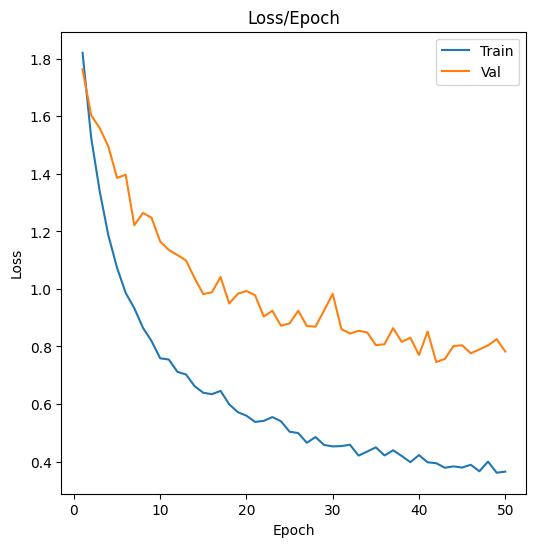

In [ ]:
plot_loss(trained_aug2_info["train_loss"], trained_aug2_info["val_loss"], ["Train", "Val"])

In [30]:
truel, predl = labels_and_predictions(dataloader_test, trained_model_aug2, device)

In [33]:
test_acc = accuracy(truel,predl)
print("Accuracy: ", test_acc)
print(classification_report(truel, predl, target_names=class_labels))

Accuracy:  71.42857142857143
              precision    recall  f1-score   support

     blueTit       1.00      0.40      0.57        15
   chaffinch       0.91      0.67      0.77        15
     coalTit       0.67      0.67      0.67        15
   goldfinch       0.77      0.67      0.71        15
    greatTit       0.48      0.73      0.58        15
       robin       0.93      0.93      0.93        15
    starling       0.64      0.93      0.76        15

    accuracy                           0.71       105
   macro avg       0.77      0.71      0.71       105
weighted avg       0.77      0.71      0.71       105



### Finetuning

In [ ]:
# unfreeze_layers(trained_model_aug2)
# model_aug2, model_aug2_info = train_model(model=trained_model_aug2, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug2)

In [ ]:
# torch.save({"aug2": model_aug2.state_dict(), "aug2_info": model_aug2_info, "freeze_aug1_info": trained_aug2_info},"aug2Model_40.tar")

### Round 2 Results

In [ ]:
# visualize_model(model_aug2, dataloader_tiny_val, class_labels, device)

In [ ]:
# plot_accuracies(model_aug2_info["train_loss"], model_aug2_info["val_loss"], ["Train", "Val"])

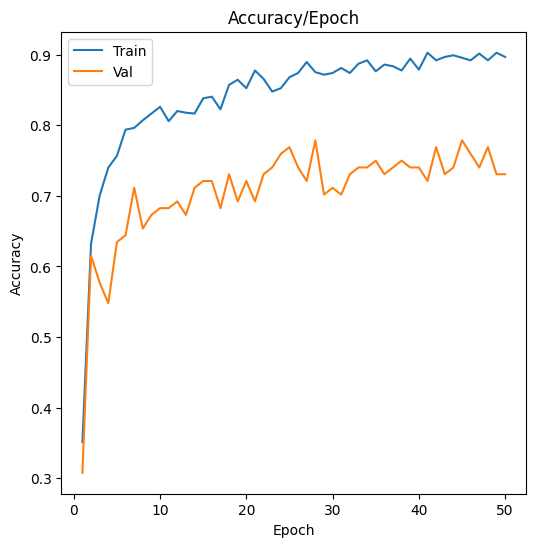

In [35]:
plot_accuracies(trained_aug2_info["train_acc"], trained_aug2_info["val_acc"], ["Train", "Val"])# 

In [ ]:
# truel, predl = labels_and_predictions(dataloader_test, model_aug2, device)
# plot_confusion_matrix(truel, predl, class_labels, normalize=True)
# print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
# class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
# print(classification_report(truel, predl, target_names=class_labels))

### On feeder

In [36]:
truel_feeder, predl_feeder = labels_and_predictions(dataloader_feeder, trained_model_aug2, device)
feeder_acc = accuracy(truel_feeder, predl_feeder)
print(classification_report(truel, predl, target_names=class_labels))
print("Accuracy", feeder_acc)

              precision    recall  f1-score   support

     blueTit       1.00      0.40      0.57        15
   chaffinch       0.91      0.67      0.77        15
     coalTit       0.67      0.67      0.67        15
   goldfinch       0.77      0.67      0.71        15
    greatTit       0.48      0.73      0.58        15
       robin       0.93      0.93      0.93        15
    starling       0.64      0.93      0.76        15

    accuracy                           0.71       105
   macro avg       0.77      0.71      0.71       105
weighted avg       0.77      0.71      0.71       105

Accuracy 30.07493865640958


In [37]:
save_function("aug2_50_lr00005.tar", trained_model_aug2, trained_aug2_info, {"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lr=0.0005"})

## Augmentation round 3

Try without jitter

In [38]:
# Defining the transforms including augmentations (and also the basic ToTensor and normalisation)
preprocess_with_augmentation3 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=(5,5), sigma=(7, 9)), # Added
    transforms.RandomRotation(degrees=10),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomResizedCrop(size=224,scale=(0.3,1)), # lowerbound the scale at 30 % of og img to not get too small portions

    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Datasets and loaders with augmentations added 
dataset_train_aug3 = datasets.ImageFolder(PATH_TRAIN, preprocess_with_augmentation3)
dataloader_train_aug3 = torch.utils.data.DataLoader(dataset_train_aug3, batch_size=16, shuffle=True, num_workers=2)

Load in a fresh ResNet50 that's prepped for transfer learning

In [ ]:
untrained_model_aug3 = load_and_prep_resnet50()
optimizer = torch.optim.Adam(untrained_model_aug3.parameters(), lr=0.0005)

### Training
First with the frozen layers, then unfreeze for finetuning

In [40]:
trained_model_aug3, trained_aug3_info = train_model(model=untrained_model_aug3, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug3) 

Epoch 1/50
----------
Train Loss: 1.7981 Acc: 0.3844
Val Loss: 1.7494 Acc: 0.4423
Epoch time 1m 49s
----------

Epoch 2/50
----------
Train Loss: 1.5115 Acc: 0.6455
Val Loss: 1.6020 Acc: 0.6058
Epoch time 1m 41s
----------

Epoch 3/50
----------
Train Loss: 1.3087 Acc: 0.6958
Val Loss: 1.5167 Acc: 0.6154
Epoch time 1m 43s
----------

Epoch 4/50
----------
Train Loss: 1.1828 Acc: 0.7353
Val Loss: 1.4355 Acc: 0.6442
Epoch time 1m 40s
----------

Epoch 5/50
----------
Train Loss: 1.0742 Acc: 0.7641
Val Loss: 1.3716 Acc: 0.6538
Epoch time 1m 39s
----------

Epoch 6/50
----------
Train Loss: 0.9874 Acc: 0.7808
Val Loss: 1.3634 Acc: 0.6827
Epoch time 1m 49s
----------

Epoch 7/50
----------
Train Loss: 0.9139 Acc: 0.7737
Val Loss: 1.2482 Acc: 0.7308
Epoch time 1m 39s
----------

Epoch 8/50
----------
Train Loss: 0.8621 Acc: 0.7928
Val Loss: 1.2387 Acc: 0.7019
Epoch time 1m 40s
----------

Epoch 9/50
----------
Train Loss: 0.7950 Acc: 0.8240
Val Loss: 1.2069 Acc: 0.7308
Epoch time 1m 41s
----

In [ ]:
# torch.save({"aug": trained_model_aug3.state_dict(), "aug_info": trained_aug3_info},"aug3Model_50.tar")

### Training Results

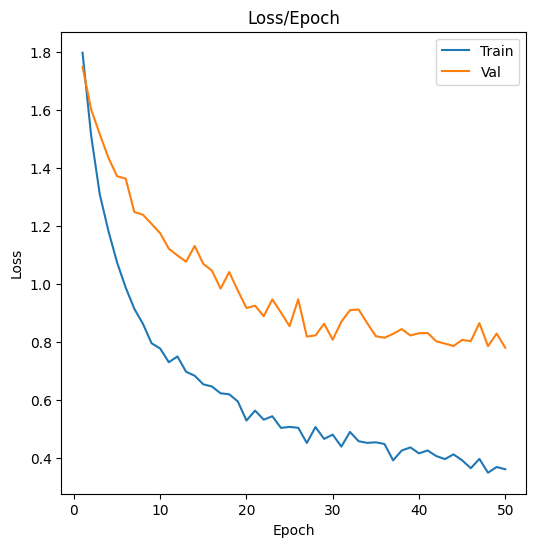

In [41]:
plot_loss(trained_aug3_info["train_loss"], trained_aug3_info["val_loss"], ["Train", "Val"])


In [42]:
truel, predl = labels_and_predictions(dataloader_test, trained_model_aug3, device)
test_acc= accuracy(truel, predl)
print("Accuracy: ", test_acc)
print(classification_report(truel, predl, target_names=class_labels))

Accuracy:  71.42857142857143
              precision    recall  f1-score   support

     blueTit       0.62      0.53      0.57        15
   chaffinch       0.83      0.67      0.74        15
     coalTit       0.67      0.53      0.59        15
   goldfinch       0.91      0.67      0.77        15
    greatTit       0.52      0.73      0.61        15
       robin       0.93      0.87      0.90        15
    starling       0.68      1.00      0.81        15

    accuracy                           0.71       105
   macro avg       0.74      0.71      0.71       105
weighted avg       0.74      0.71      0.71       105



### Finetuning

In [ ]:
# unfreeze_layers(trained_model_aug3)
# model_aug3, model_aug3_info = train_model(model=trained_model_aug3, optimizer=optimizer, num_epoch=50, train=dataloader_train_aug3)

In [ ]:
# torch.save({"aug3": model_aug3.state_dict(), "aug3_info": model_aug3_info, "freeze_aug3_info": trained_aug3_info},"aug3Model_40.tar")

### Round 3 Results

In [ ]:
# visualize_model(model_aug3, dataloader_tiny_val, class_labels, device)

In [ ]:
# plot_accuracies(model_aug3_info["train_loss"], model_aug3_info["val_loss"], ["Train", "Val"])

In [ ]:
# plot_accuracies(model_aug3_info["train_acc"], model_aug3_info["val_acc"], ["Train", "Val"])

In [ ]:
# truel, predl = labels_and_predictions(dataloader_test, trained_model_aug3, device)
# plot_confusion_matrix(truel, predl, class_labels, normalize=True)
# print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
# plot_confusion_matrix(truel, predl, class_labels, normalize=True)
# print("Accuracy", (np.sum(predl==truel)/predl.size * 100))

In [ ]:
# class_labels = ['blueTit', 'chaffinch', 'coalTit', 'goldfinch', 'greatTit', 'robin', 'starling']
# print(classification_report(truel, predl, target_names=class_labels))

### On Feeder

In [43]:
truel_feeder, predl_feeder = labels_and_predictions(dataloader_feeder, trained_model_aug3, device)

[[ 480    0    8  132  193    0 1265]
 [ 148  109   10  140  119   21 3005]
 [  55    0   78    3  177    0 1533]
 [  95   11    3 1321   96    3  471]
 [ 140    0   15   97  360    0 1421]
 [   0   20    0  106    8    0 1294]
 [  13    1    3    1   15    3 2106]]
Accuracy 29.537767756482523


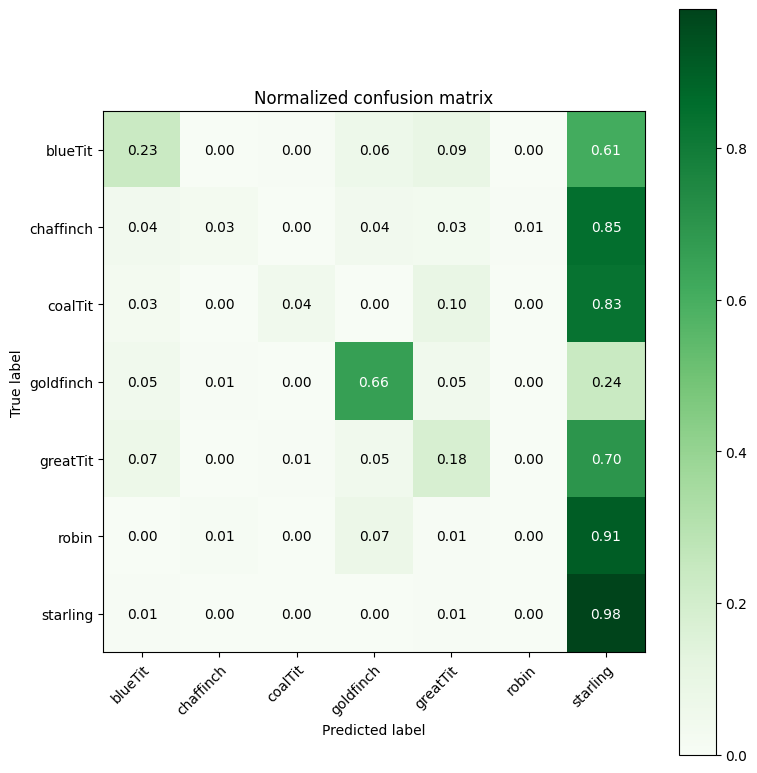

In [44]:
plot_confusion_matrix(truel_feeder, predl_feeder, class_labels, normalize=True)
feeder_acc = accuracy(truel_feeder, predl_feeder)
print("Accuracy", feeder_acc)

In [45]:
save_function("aug3_50_lr00005.tar", trained_model_aug3, trained_aug3_info, {"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lr=0.0005"})

In [ ]:
m, i = load_function("Models/aug3_50_lr00005.tar")
print_stats(i)